In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C20_root_excluded_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55          7.3835 ( 7.1176,  7.7535) ( 7.0846,  7.7018)  0.6173 (Jnode 106)\n',
 't_n56          7.2280 ( 7.0591,  7.4087) ( 7.0548,  7.4018)  0.3470 (Jnode 105)\n',
 't_n57          6.9429 ( 6.8180,  7.0783) ( 6.8077,  7.0674)  0.2597 (Jnode 104)\n',
 't_n58          6.4274 ( 6.3500,  6.5081) ( 6.3471,  6.5043)  0.1572 (Jnode 103)\n',
 't_n59          6.3262 ( 6.2509,  6.4009) ( 6.2507,  6.4006)  0.1499 (Jnode 102)\n',
 't_n60          6.1821 ( 6.1058,  6.2562) ( 6.1072,  6.2571)  0.1499 (Jnode 101)\n',
 't_n61          5.9714 ( 5.8884,  6.0490) ( 5.8931,  6.0528)  0.1597 (Jnode 100)\n',
 't_n62          3.5122 ( 2.9553,  3.9724) ( 3.0031,  4.0016)  0.9985 (Jnode 99)\n',
 't_n63          5.1414 ( 5.0510,  5.2363) ( 5.0494,  5.2341)  0.1848 (Jnode 98)\n',
 't_n64          4.4670 ( 4.4155,  4.5265) ( 4.4120,  4.5218)  0.1097 (Jnode 97)\n',
 't_n65          4.2170 ( 4.2069,  4.2439) ( 4.2057,  4.2375)  0.0318 (Jnode 96)\n',
 't_n66          3.5750 ( 3.5265,  3.6264) ( 3.5259,  3.62

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_iqtree.append(float(line[3][1:-1]))
    else:
        lower_ci_iqtree.append(float(line[3][1:-1]))
    if line[4].startswith('('):
        upper_ci_iqtree.append(float(line[4][1:-1]))
    else:
        upper_ci_iqtree.append(float(line[4][:-1]))
    # posterior_mean_baseml.append(float(line[4]))
    # lower_ci_baseml.append(float(line[5]))
    # upper_ci_baseml.append(float(line[6]))
#
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[7.3835,
 7.228,
 6.9429,
 6.4274,
 6.3262,
 6.1821,
 5.9714,
 3.5122,
 5.1414,
 4.467,
 4.217,
 3.575,
 3.1836,
 1.9962,
 0.886,
 4.4055,
 6.2437,
 6.0767,
 5.9866,
 4.9755,
 4.6387,
 5.067,
 6.1666,
 6.0133,
 5.8789,
 5.7073,
 5.4681,
 5.375,
 5.1546,
 4.9939,
 4.7787,
 4.0094,
 3.782,
 5.0678,
 4.4924,
 6.1052,
 1.763,
 6.0098,
 5.8048,
 5.4833,
 5.3074,
 4.3969,
 4.7963,
 5.2559,
 5.1125,
 4.8359,
 3.915,
 4.7575,
 6.4257,
 5.1651,
 3.6097,
 2.8183,
 5.6687]

In [7]:
lower_ci_iqtree

[0.1176,
 0.0591,
 0.818,
 0.35,
 0.2509,
 0.1058,
 0.8884,
 0.9553,
 0.051,
 0.4155,
 0.2069,
 0.5265,
 0.1799,
 0.9135,
 0.7359,
 0.1692,
 0.1665,
 0.9536,
 0.9092,
 0.7108,
 0.3154,
 0.0438,
 0.0988,
 0.9459,
 0.8106,
 0.6431,
 0.4242,
 0.337,
 0.1405,
 0.9896,
 0.7141,
 0.7939,
 0.5315,
 0.9857,
 0.2889,
 0.0375,
 0.1573,
 0.9482,
 0.755,
 0.4584,
 0.3,
 0.1257,
 0.7117,
 0.1514,
 0.9974,
 0.6578,
 0.5478,
 0.4264,
 0.3245,
 0.8589,
 0.1723,
 0.0134,
 0.9931]

In [8]:
upper_ci_iqtree

[7.7535,
 7.4087,
 7.0783,
 6.5081,
 6.4009,
 6.2562,
 6.049,
 3.9724,
 5.2363,
 4.5265,
 4.2439,
 3.6264,
 3.1938,
 2.0464,
 1.0401,
 4.6099,
 6.3215,
 6.1997,
 6.0624,
 5.176,
 4.9045,
 5.1255,
 6.2369,
 6.0836,
 5.9498,
 5.7726,
 5.5158,
 5.4182,
 5.1805,
 5.0045,
 4.8326,
 4.1954,
 4.0035,
 5.1543,
 4.684,
 6.1752,
 2.3861,
 6.075,
 5.8572,
 5.5001,
 5.3259,
 4.5774,
 4.8973,
 5.3597,
 5.2383,
 5.0136,
 4.2638,
 5.0466,
 6.5626,
 5.4757,
 4.1198,
 3.6077,
 6.3788]

In [9]:
file_LG = open("LG_root_excluded_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
    if line[3].startswith('('):
        lower_ci_baseml.append(float(line[3][1:-1]))
    else:
         lower_ci_baseml.append(float(line[3][:-1]))
    if line[4].startswith('('):
        upper_ci_baseml.append(float(line[4][1:-1]))
    else:
         upper_ci_baseml.append(float(line[4][:-1]))
        
    
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

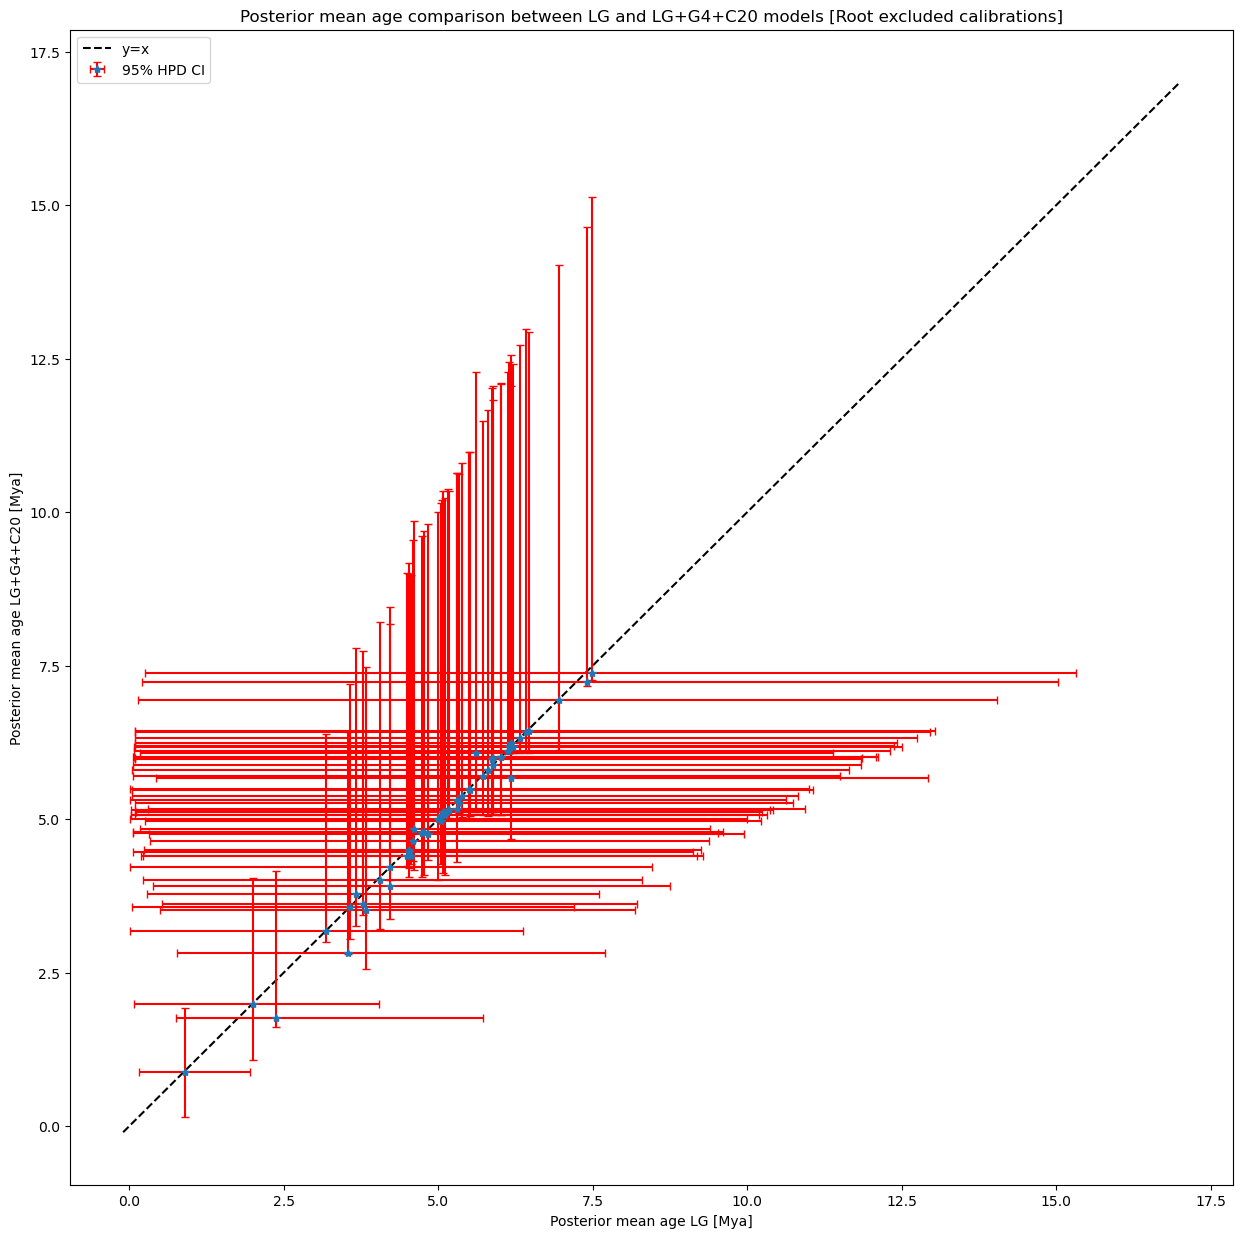

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(15, 15))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
            xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')

# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 models [Root excluded calibrations]')
ax.legend()

# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_re.png')

In [11]:
posterior_mean_baseml

[7.4937,
 7.3983,
 6.9502,
 6.4701,
 6.3264,
 6.1441,
 5.8754,
 3.837,
 5.1594,
 4.5268,
 4.2179,
 3.5762,
 3.1836,
 1.9964,
 0.9023,
 4.5002,
 6.1698,
 5.6117,
 5.8869,
 5.0396,
 4.5903,
 5.0674,
 6.2104,
 6.0187,
 5.8885,
 5.7199,
 5.5055,
 5.3884,
 5.168,
 4.9933,
 4.7366,
 4.0575,
 3.6717,
 5.1139,
 4.5313,
 6.1197,
 2.3694,
 6.0102,
 5.7969,
 5.4902,
 5.3047,
 4.5595,
 4.7632,
 5.3274,
 5.0687,
 4.6127,
 4.2129,
 4.8298,
 6.4164,
 5.3071,
 3.786,
 3.5427,
 6.1757]

In [12]:
posterior_mean_iqtree

[7.3835,
 7.228,
 6.9429,
 6.4274,
 6.3262,
 6.1821,
 5.9714,
 3.5122,
 5.1414,
 4.467,
 4.217,
 3.575,
 3.1836,
 1.9962,
 0.886,
 4.4055,
 6.2437,
 6.0767,
 5.9866,
 4.9755,
 4.6387,
 5.067,
 6.1666,
 6.0133,
 5.8789,
 5.7073,
 5.4681,
 5.375,
 5.1546,
 4.9939,
 4.7787,
 4.0094,
 3.782,
 5.0678,
 4.4924,
 6.1052,
 1.763,
 6.0098,
 5.8048,
 5.4833,
 5.3074,
 4.3969,
 4.7963,
 5.2559,
 5.1125,
 4.8359,
 3.915,
 4.7575,
 6.4257,
 5.1651,
 3.6097,
 2.8183,
 5.6687]

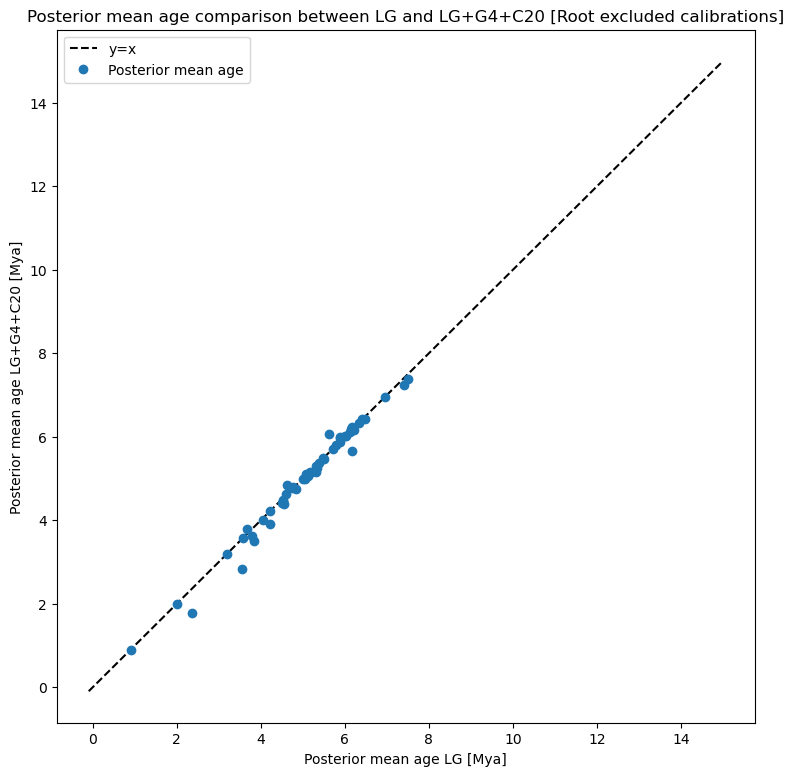

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,15], 
        [-0.1, 15], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]')
ax.set_ylabel('Posterior mean age LG+G4+C20 [Mya]')
ax.set_title('Posterior mean age comparison between LG and LG+G4+C20 [Root excluded calibrations]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C20_re_scatter.png')